<a href="https://colab.research.google.com/github/Alecia113/NLP-Ex/blob/main/lab5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
#You can enable GPU here (cuda); or just CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 

### Download Dataset

In [2]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '1gNfBqguzBu8cHKMPc8C44GbvD443dNC5'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('twitter.csv')  

import pandas as pd
df = pd.read_csv("twitter.csv")
df_pick = df.sample(400,random_state=24)

raw_text = df_pick["Text"].tolist()
raw_label = df_pick["Label"].tolist()

from sklearn.model_selection import train_test_split
text_train,text_test,label_train,label_test = train_test_split(raw_text,raw_label,test_size=0.25,random_state=42) #test_size=0.25表示取了四分之一的数据来测试模型

**Case Folding**

In [3]:
text_train = [s.lower() for s in text_train]
text_test = [s.lower() for s in text_test]

**Remove punctuations [Please complete this section]**

In [ ]:
#删标点
import re
import pprint
def remove_punctuation_re(x):
    # Please complete this
    x = re.sub(r'[^\w\s]', '', str(x))
    #x = re.sub(r"([.!?])", r" \1", x) #后自己加的
    #re.replace('"','')
    #re.replace('','')
    #>>> print (re.sub(r'([^:\n]*:[^:\n]*\n)\s*:(.+)', r'\1\2', st))
    return x
    
text_train = [remove_punctuation_re(s) for s in text_train]
text_test = [remove_punctuation_re(s) for s in text_test]
pprint.pprint(text_train[10:20])
#print('-')
#pprint.pprint(text_test[10:20])

### Download Dataset

In [ ]:
# 去除了反而不行了 还是token出了问题
'''
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize       #, sent_tokenize#分句子

tokenized_sentence_train = word_tokenize(str(text_train))
#pprint.pprint(tokenized_sentence_train)

tokenized_sentence_test = word_tokenize(str(text_test))
#pprint.pprint(tokenized_sentence_test)

tokenized_sentence1 =sent_tokenize(str(text_train))
token_word1 = word_tokenize(str(tokenized_sentence1))
train_tok.append(token_word1)

pprint.pprint(train_tok)

#pprint.pprint(train_tok)
#pprint.pprint(len(train_tok)) 
#pprint.pprint(len(train_tok[0]))#5139

test_tok = []
tokenized_sentence2 =sent_tokenize(str(text_test))
token_word2 = word_tokenize(str(tokenized_sentence2))
test_tok.append(token_word2)


#pprint.pprint(test_tok)
#pprint.pprint(len(test_tok)) #1
#pprint.pprint(len(test_tok[0]))#1695
'''

In [ ]:
#要 去除了反而不行了 还是token出了问题

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize


train_tok = []
tokenized_sentence1 =sent_tokenize(str(text_train))
token_word1 = word_tokenize(str(tokenized_sentence1))
train_tok.append(token_word1)

pprint.pprint(train_tok)

#pprint.pprint(train_tok)
#pprint.pprint(len(train_tok)) 
#pprint.pprint(len(train_tok[0]))#5139

test_tok = []
tokenized_sentence2 =sent_tokenize(str(text_test))
token_word2 = word_tokenize(str(tokenized_sentence2))
test_tok.append(token_word2)

#pprint.pprint(test_tok)
#pprint.pprint(len(test_tok)) #1
#pprint.pprint(len(test_tok[0]))#1695


In [ ]:
#tokenized_sentence_train

In [ ]:
#stop
nltk.download('stopwords')
from nltk.corpus import stopwords as sw
stop_words = sw.words()
stop_words = sw.words() + ["'",'"',','] #remove stopwords +
text_train_ns=[]
for tokens in train_tok: #b
    filtered_sentence = [w for w in tokens if not w in stop_words]
    text_train_ns.append(filtered_sentence)
pprint.pprint(text_train_ns)

text_test_ns=[]
for tokens in test_tok:
    #Please complete this
    filtered_sentence = [w for w in tokens if not w in stop_words]
    text_test_ns.append(filtered_sentence)



In [ ]:
#要 
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

text_train_le = []
for tokens in text_train_ns:
    lemma_sentence = [lemmatizer.lemmatize(w) for w in tokens ]
    text_train_le.append(lemma_sentence)
  
pprint.pprint(text_train_le)

text_test_le = []
for tokens in text_test_ns:
  lemma_sentence = [lemmatizer.lemmatize(w) for w in tokens]
  text_test_le.append(lemma_sentence)
    #Please complete this

pprint.pprint(text_test_le)



In [8]:
#出来了https://blog.csdn.net/weixin_38278334/article/details/82971752?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522161838894616780269822484%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=161838894616780269822484&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~baidu_landing_v2~default-1-82971752.first_rank_v2_pc_rank_v29&utm_term=fit_transform+用法

import numpy as np

from sklearn.preprocessing import LabelEncoder

unique_labels = np.unique(label_train)    #lEnc.fit(labels)  

lEnc = LabelEncoder() #一样
# Please encode the labels (Do NOT add new lines of code in this section)
# Hint: Try to understand the difference between fit_transform and transform
label_train_encoded = lEnc.fit_transform(label_train)
label_test_encoded = lEnc.fit_transform(label_test)

n_class = len(unique_labels)
print(unique_labels)
print(lEnc.transform(unique_labels))  #label_encoded

['none' 'racism' 'sexism']
[0 1 2]


In [9]:
word_set = set() 
for sent in text_train_le:
    for word in sent:
        word_set.add(word)
word_set.add('[PAD]') #224
word_set.add('[UNKNOWN]') #225

word_list = list(word_set) 
word_list.sort()
print(word_list)

word_index = {}
ind = 0
for word in word_list:
    word_index[word] = ind
    ind += 1
print(word_index)


#'"

["''", "'0xjared", "'17", "'absolutely", "'after", "'alihadi68", "'amberhasalamb", "'amohedin", "'anasmechch", "'and", "'antizholim", "'arab_fury", "'argh", "'argonblue", "'asem_1994", "'at", "'bahai144", "'benkuchera", "'bhamdailynews", "'biebervalue", "'blackopal80", "'bristolben", "'bruciebabe", "'burcucekmece", "'but", "'buttercupashby", "'can", "'celine", "'cemcfarland", "'channel7", "'christophheer52", "'chuckpfarrer", "'colin", "'come", "'cringing", "'curious", "'damnitscloudy", "'dankmtl", "'darchmare", "'darrenkopp", "'desertfox899", "'dianh4", "'did", "'directhex", "'discerningmumin", "'do", "'doammuslims", "'dont", "'edgeofthesandbx", "'eloisepeace", "'even", "'exposefalsehood", "'f3ew", "'farbenstau", "'finalbroadcast", "'floss", "'foodie_ben", "'freebsdglri", "'fuck", "'gbabeuf", "'glennf", "'go", "'goosenetworkusa", "'halalflaws", "'haroonstyles", "'having", "'hdmovieus", "'how", "'howtogetawaywithmurder", "'httptcofdylhlkdcv", "'httptcoltoxypkwww", "'httptcozjbwagvnrg", 

Sample output for Get Word List (Only for format reference since the following pic is not a full print result. But the format is clear to see.)

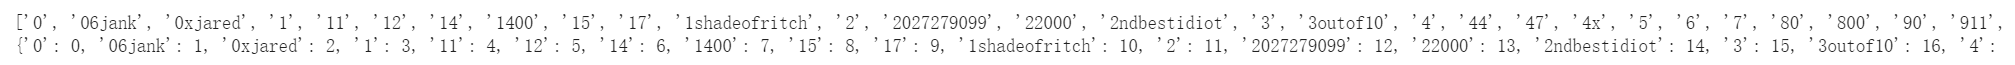

In [21]:
# The sequence length is pre-defined, you can't change this value for this exercise
seq_length = 16

# Please Complete this function
# Hint: You should pay attention to: (1) if the sentence length > seq_length (2) if the word not in word_index dictionary
def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []
    for sent in text_train_le:
      temp_encoded = [word_index[word] for word in sent]
      if len(temp_encoded) < seq_length:
        temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
        sent_encoded.append(temp_encoded)
      elif len(temp_encoded) > seq_length:
        temp_encoded = [word_index['[UNKNOWN]']]
        #temp_encoded = dict.get(word_index[word],word_index['[UNKNOWN]']) #当字典中有voteIlabel元素时，classCount.get(voteIlabel,0)作用是返回该元素对应的值，即0
        sent_encoded.append(temp_encoded)

    return sent_encoded

train_pad_encoded = encode_and_add_padding(text_train_le, seq_length, word_index )
test_pad_encoded = encode_and_add_padding(text_test_le, seq_length, word_index )

In [ ]:
import gensim.downloader as api
word_emb_model = api.load("glove-twitter-50") # Download an embedding other than glove-twitter-25

[==================================================] 100.0% 199.5/199.5MB downloaded


In [ ]:
# Get the Embedding lookup table
import numpy as np
emb_dim = word_emb_model.vector_size

emb_table = []
for i, word in enumerate(word_list):
    if word in word_emb_model:
        emb_table.append(word_emb_model[word])
    else:
        emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)

# print(emb_table)

In [ ]:
vocab_size = len(word_list)
n_hidden = 50
total_epoch = 100
learning_rate = 0.01

In [ ]:
import torch
#You can enable GPU here (cuda); or just CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import numpy as np

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.emb.weight.data.copy_(torch.from_numpy(emb_table)) #1722 50
        self.emb.weight.requires_grad = False
        self.lstm = nn.LSTM(emb_dim, n_hidden, num_layers=2, batch_first =True, dropout=0.2)
        self.linear = nn.Linear(n_hidden,n_class)

    def forward(self, x):
        x = self.emb(x)
        x,_ = self.lstm(x)
        x = self.linear(x[:,-1,:])
        return x


model = Model().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

input_torch = torch.from_numpy(np.array(train_pad_encoded)).to(device)  #1,6758
target_torch = torch.from_numpy(np.array(label_train_encoded)).view(-1).to(device)  #300
#tensor([[225, 231, 225,  ..., 227, 227, 227]])
#print(input_torch[0][0]) 225

for epoch in range(total_epoch):  
    
    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch)  #tensor([[-0.0251,  0.0397,  0.0228]]
    loss = criterion(outputs, target_torch)
    loss.backward()
    optimizer.step()
    
    if epoch%10 == 9:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),target_torch.cpu().numpy())

        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))

print('Finished Training')


Sample output for model training (Only for format reference)

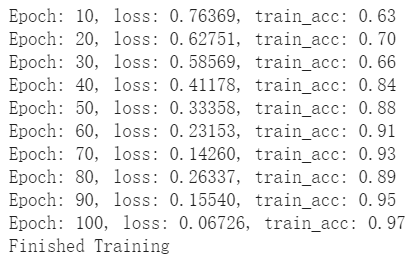

In [ ]:
torch.save(model,'lab5.pt')

In [ ]:
model2 = torch.load('lab5.pt')
model2.eval()

In [ ]:
input_torch = torch.from_numpy(np.array(test_pad_encoded)).to(device)

outputs = model2(input_torch)  
predicted = torch.argmax(outputs, -1)

from sklearn.metrics import classification_report
print(classification_report(label_test_encoded,predicted.cpu().numpy()))

Sample output for Testing (Only for format reference)

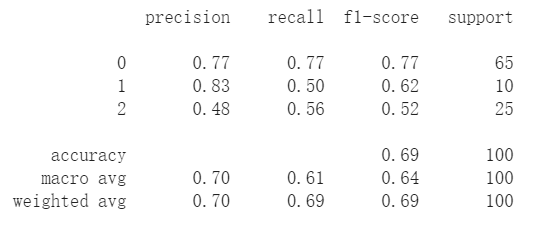